In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]
feature_ims = np.moveaxis(feature_ims, [0,1,2], [1,0,2])

In [4]:
from utils import default_paths
fn = os.path.join(default_paths.sketch_token_feat_path,\
                  'Sketch_token_feature_curvrect_stats.npy')
stats = np.load(fn, allow_pickle=True).item()

In [5]:
stats.keys()

dict_keys(['curv_score_method1', 'lin_score_method1', 'curv_score_method2', 'rect_score_method2', 'lin_score_method2', 'mean_curv', 'mean_rect', 'mean_lin', 'mean_curv_z', 'mean_rect_z', 'mean_lin_z', 'max_curv', 'max_rect', 'max_lin', 'max_curv_z', 'max_rect_z', 'max_lin_z', 'best_curv_kernel', 'best_rect_kernel', 'best_lin_kernel', 'best_curv_kernel_z', 'best_rect_kernel_z', 'best_lin_kernel_z'])

In [6]:
c_means1 = np.mean(np.mean(stats['curv_score_method1'], axis=0), axis=0)
l_means1 = np.mean(np.mean(stats['lin_score_method1'], axis=0), axis=0)

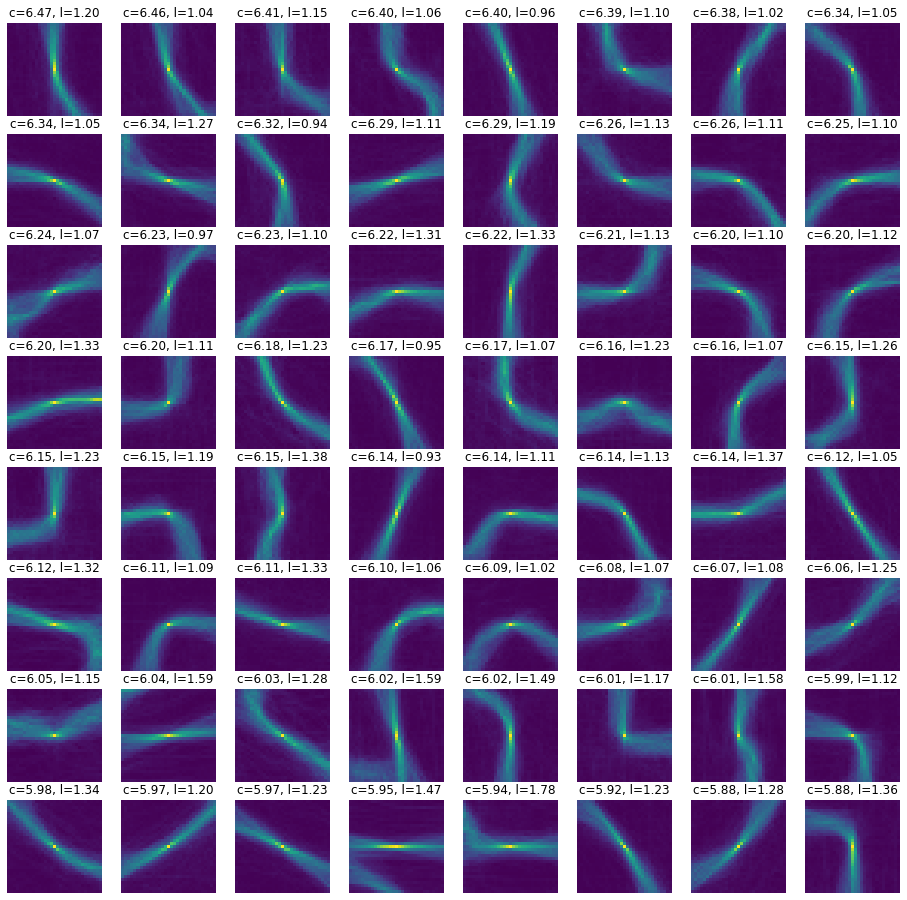

In [7]:
plot_order = np.flip(np.argsort(c_means1))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('c=%.2f, l=%.2f'%(c_means1[ff], l_means1[ff]))

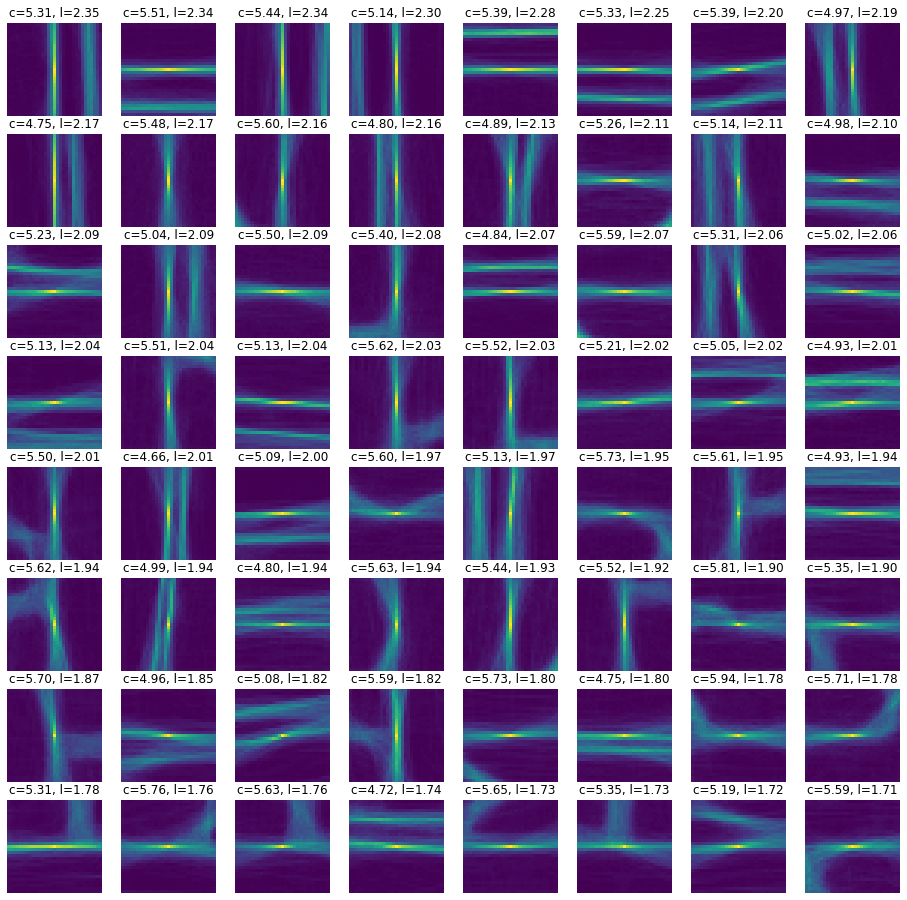

In [8]:
plot_order = np.flip(np.argsort(l_means1))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('c=%.2f, l=%.2f'%(c_means1[ff], l_means1[ff]))

In [9]:
c_mean = np.mean(np.mean(stats['mean_curv_z'], axis=0), axis=0)
r_mean = np.mean(np.mean(stats['mean_rect_z'], axis=0), axis=0)
l_mean = np.mean(np.mean(stats['mean_lin_z'], axis=0), axis=0)
c_score = (c_mean-r_mean-l_mean)/((c_mean+r_mean+l_mean))

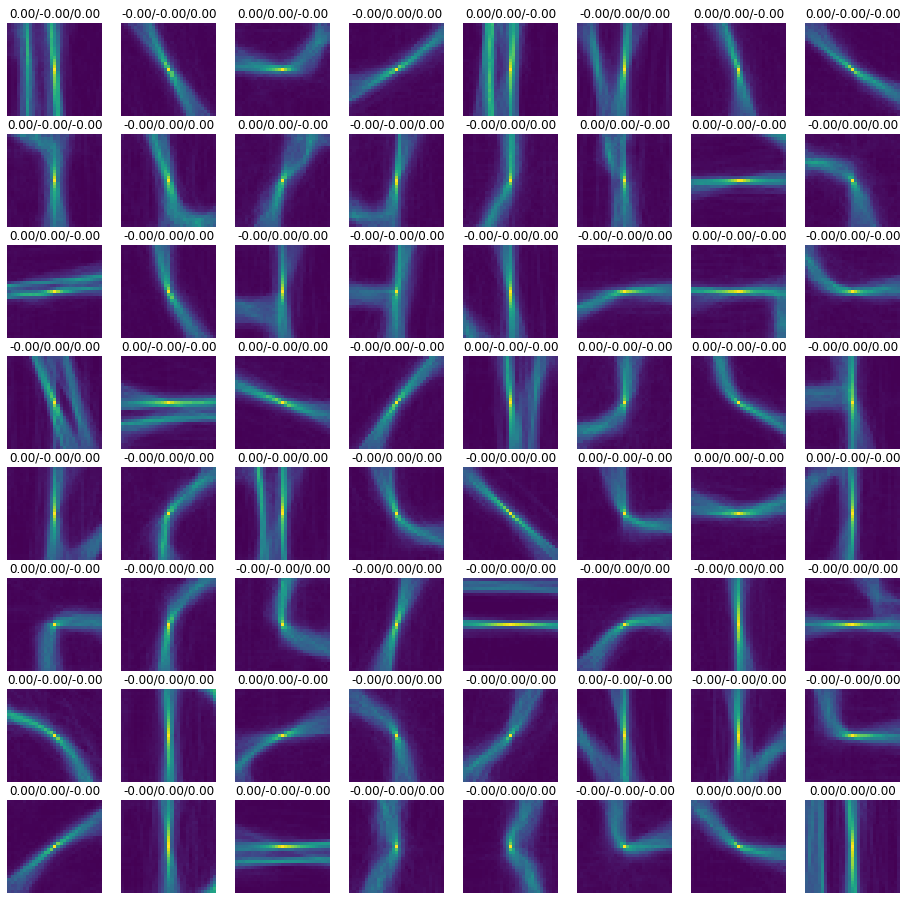

In [10]:
# plot_order = np.flip(np.argsort(c_score))
plot_order = np.argsort(c_score)
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_mean[ff], r_mean[ff], l_mean[ff]))

In [124]:
c_means2 = np.mean(np.mean(stats['curv_score_method2'], axis=0), axis=0)
l_means2 = np.mean(np.mean(stats['lin_score_method2'], axis=0), axis=0)
r_means2 = np.mean(np.mean(stats['rect_score_method2'], axis=0), axis=0)

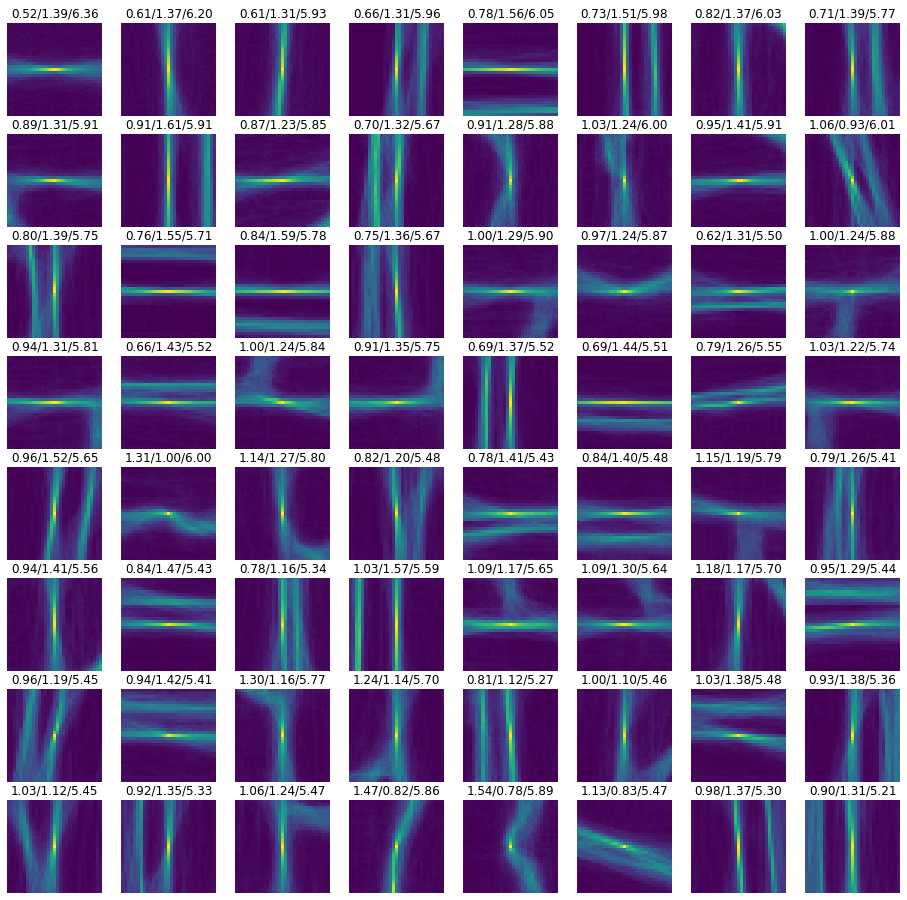

In [132]:
plot_order = np.flip(np.argsort(r_means2-c_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

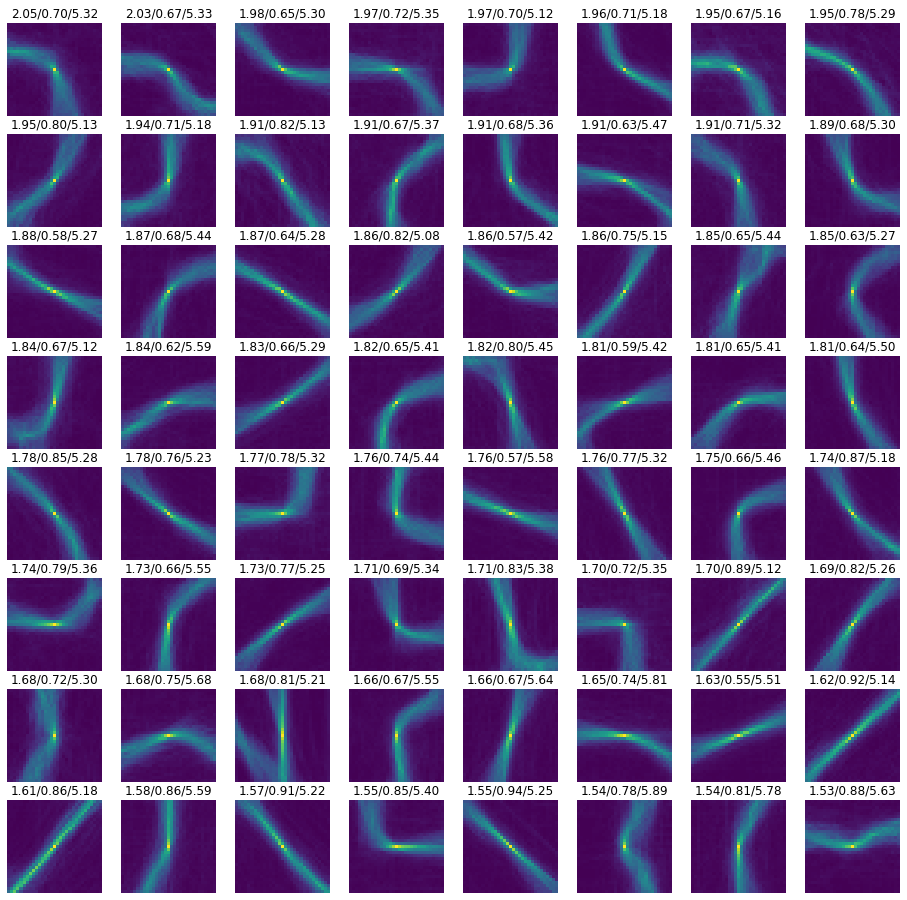

In [125]:
plot_order = np.flip(np.argsort(c_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

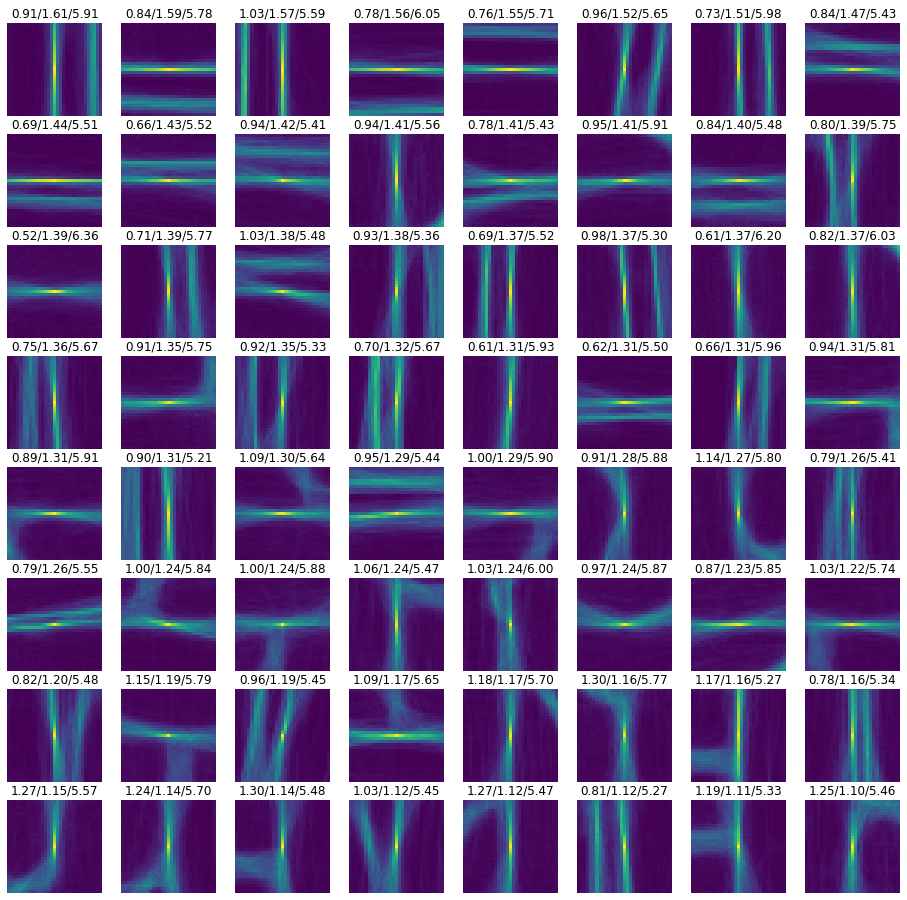

In [126]:
plot_order = np.flip(np.argsort(l_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

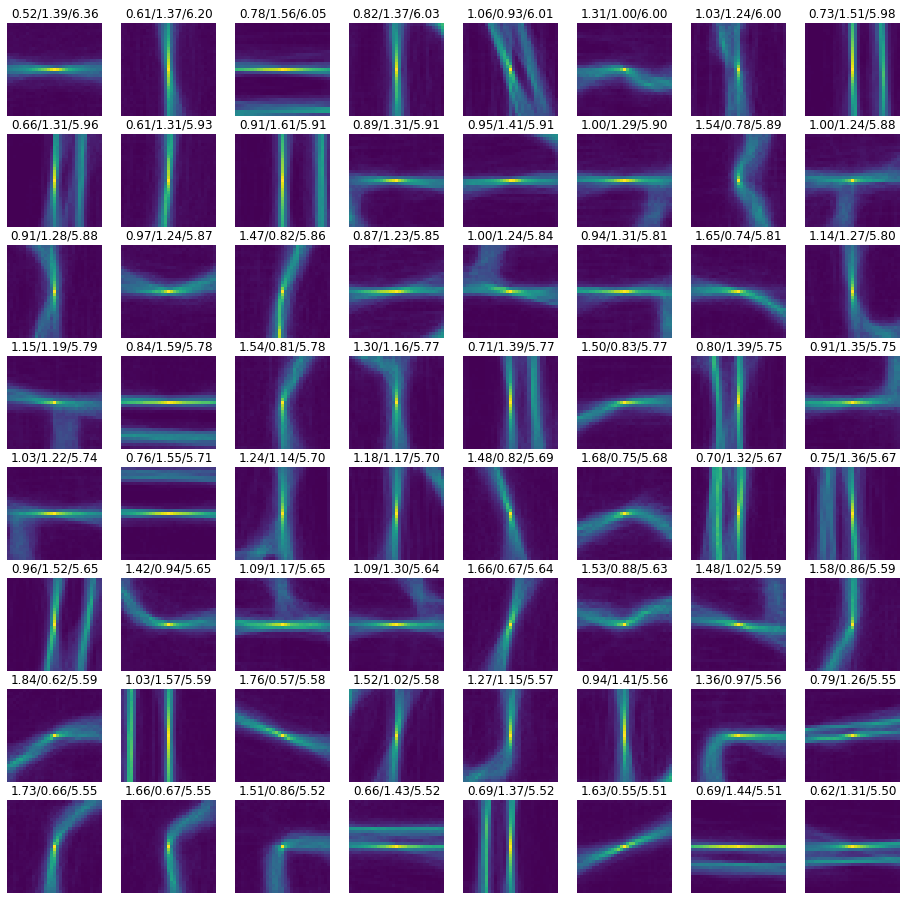

In [128]:
plot_order = np.flip(np.argsort(r_means2))
n2plot = 64;
npx=8;npy=8;
plt.figure(figsize=(16,16));
for fi, ff in enumerate(plot_order[0:n2plot]):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff].T)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%.2f/%.2f/%.2f'%(c_means2[ff], l_means2[ff], r_means2[ff]))

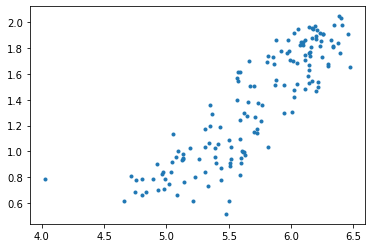

In [129]:
plt.figure();
plt.plot(c_means1, c_means2,'.')


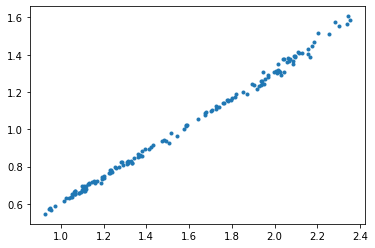

In [130]:
plt.figure();
plt.plot(l_means1, l_means2,'.')


Text(0.5, 0.98, 'feature 0')

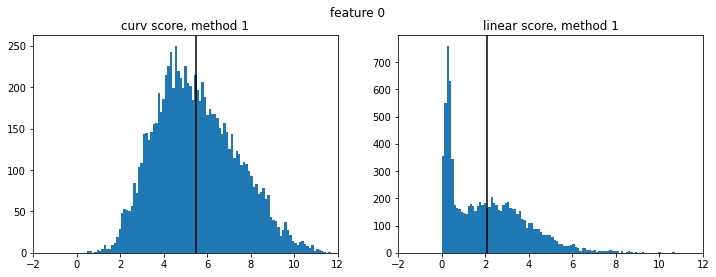

In [28]:
ff = 0;

lims = [-2,12]

plt.figure(figsize=(12,4));
plt.subplot(1,2,1)
vals = stats['curv_score_method1'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('curv score, method 1')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,2,2)
vals = stats['lin_score_method1'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('linear score, method 1')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

Text(0.5, 0.98, 'feature 0')

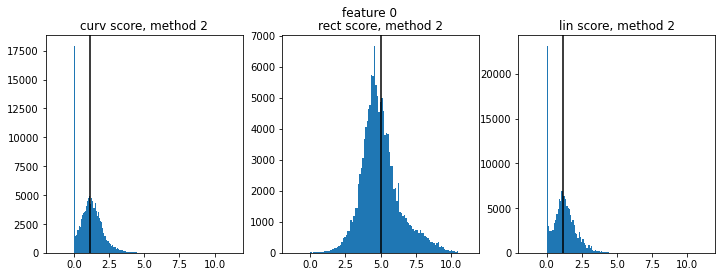

In [41]:
ff = 0;

lims = [-2, 12]

vals = stats['curv_score_method2'][:,:,ff].ravel()
plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
plt.hist(vals, 100);
plt.title('curv score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


plt.subplot(1,3,2)
vals = stats['rect_score_method2'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('rect score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['lin_score_method2'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('lin score, method 2')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

Text(0.5, 0.98, 'feature 0')

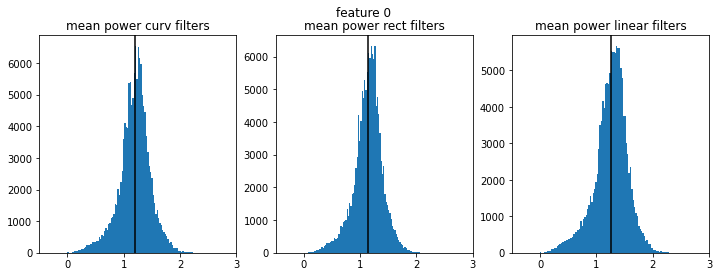

In [42]:
ff = 0;

lims = [-0.5, 3]

plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
vals = stats['mean_curv'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power curv filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


plt.subplot(1,3,2)
vals = stats['mean_rect'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power rect filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['mean_lin'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power linear filters')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

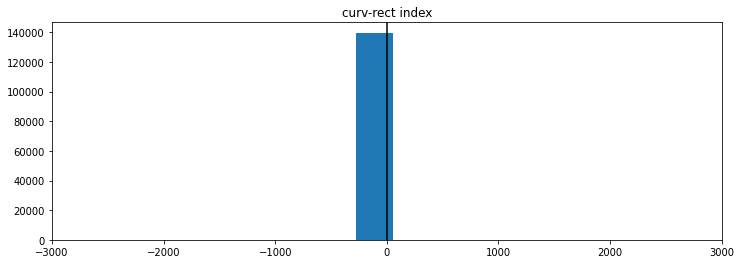

In [56]:
ff = 0;

lims = [-3000,3000]

plt.figure(figsize=(12,4));
vals = stats['curv_rect_index'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('curv-rect index')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


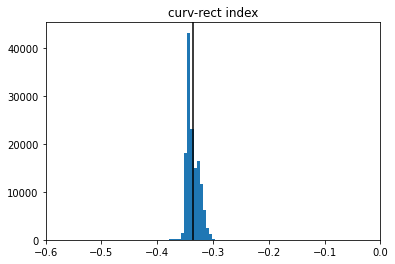

In [72]:
ff = 0;

lims = [-0.6, 0]

plt.figure(figsize=(6,4));

curv = stats['mean_curv'][:,:,ff]
rect = stats['mean_rect'][:,:,ff]
lin = stats['mean_lin'][:,:,ff]
curv_rect_index = (curv-rect-lin)/(curv+rect+lin)

vals = curv_rect_index.ravel()
plt.hist(vals, 100);
plt.title('curv-rect index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


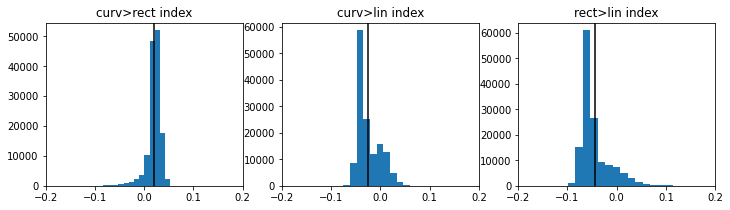

In [77]:
ff = 0;

lims = [-0.2, 0.2]


curv = stats['mean_curv'][:,:,ff]
rect = stats['mean_rect'][:,:,ff]
lin = stats['mean_lin'][:,:,ff]

plt.figure(figsize=(12,3));

plt.subplot(1,3,1)

index = (curv-rect)/(curv+rect)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('curv>rect index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')

plt.subplot(1,3,2)

index = (curv-lin)/(curv+lin)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('curv>lin index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')

plt.subplot(1,3,3)

index = (rect-lin)/(rect+lin)

vals = index.ravel()
plt.hist(vals, 100);
plt.title('rect>lin index')
plt.xlim(lims)
plt.axvline(np.nanmean(vals), color='k')


Text(0.5, 0.98, 'feature 0')

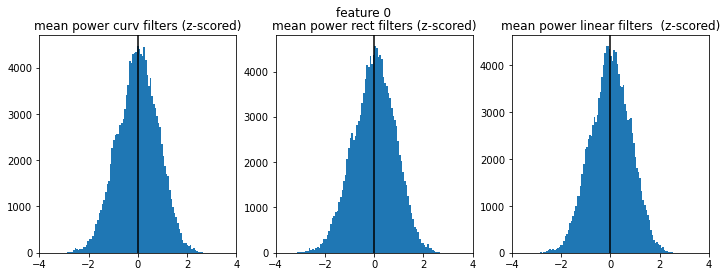

In [43]:
ff = 0;

lims = [-4,4]

plt.figure(figsize=(12,4));
plt.subplot(1,3,1)
vals= stats['mean_curv_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power curv filters (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,2)
vals = stats['mean_rect_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power rect filters (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.subplot(1,3,3)
vals = stats['mean_lin_z'][:,:,ff].ravel()
plt.hist(vals, 100);
plt.title('mean power linear filters  (z-scored)')
plt.xlim(lims)
plt.axvline(np.mean(vals), color='k')

plt.suptitle('feature %d'%ff)

In [31]:
stats['lin_score_method2'].shape

(96, 1456, 150)